 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [ ]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
img_rows, img_cols = 28, 28
num_classes = 10

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

In [4]:
# y = train[['label']]
y = train.loc[:,['label']]

In [5]:
X = train.drop(['label'], axis=1).copy()

In [6]:
def data_prep(raw):
    out_y = to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [7]:
x, y = data_prep(train)

In [8]:
test=test/255.0

In [9]:
test=test.values.reshape(-1,28,28,1)

In [10]:
# bez tego wywala błąd
from tensorflow.python.keras.engine import data_adapter

def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Creating the Model</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1.Model_1</p>

In [27]:
# Model 1   0.98807
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Dropout(0.5))
model.add(Conv2D(28, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Dropout(0.5))
#Now we need to take these extracted features and add a way to classify them
model.add(Flatten())
# (spłaszczony wynik +1 biases) x 128 dodanych neuronów
# (1008+1)x128=129152
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A2.Model_2</p>

In [28]:
# MODEL 2 0.99182
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
#                  strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3, 3), 
#                 strides=2,
                  padding='same',
                  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A3.Model_3</p>

In [29]:
# MODEL 3 0.99039
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
#                  strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), 
#                 strides=2,
                  padding='same',
                  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A31.Model_31</p>

In [ ]:
# MODEL 3 0.99039
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
#                  strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), 
#                 strides=2,
                  padding='same',
                  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A4.Model_4</p>

In [111]:
# MODEL 4 0.99221  0.99364
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
#                  strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),
#                  strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), 
#                 strides=2,
                  padding='same',
                  activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), 
#                 strides=2,
                  padding='same',
                  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A5.Model_5</p>

In [11]:
# MODEL 5 0.99221  0.99364  0.99542
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3),
#                  strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),
#                  strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), 
#                 strides=2,
                  padding='same',
                  activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), 
#                 strides=2,
                  padding='same',
                  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">Training the Model</p>

In [12]:
# Stop training when a monitored quantity has stopped improving.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [13]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
# lr = ReduceLROnPlateau(monitor=‘val_loss’,factor=.4,patience=3,min_lr = .00001)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',
                                         patience=3,
                                         verbose=1,
                                         factor=0.5,
                                         min_lr=0.00001)

In [67]:
# from tensorflow.keras.optimizers import Adam

In [14]:
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss='binary_crossentropy',
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# 0.99364 po dodaniu do callback
# callbacks=[early_stop, learning_rate_reduction]

# Epoch 20/50
# 263/263 [==============================] - 10s 38ms/step - loss: 3.3869e-05 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9933
# Epoch 20: early stopping

In [17]:
model.fit(x, y,
        batch_size=128,
        epochs=50,
        validation_split = 0.2, verbose=1,
#         callbacks=[early_stop, learning_rate_reduction]
        )

Epoch 1/50
263/263 [==============================] - 9s 33ms/step - loss: 0.2679 - accuracy: 0.9161 - val_loss: 0.0699 - val_accuracy: 0.9771
Epoch 2/50
263/263 [==============================] - 9s 32ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0464 - val_accuracy: 0.9843
Epoch 3/50
263/263 [==============================] - 9s 33ms/step - loss: 0.0451 - accuracy: 0.9858 - val_loss: 0.0414 - val_accuracy: 0.9874
Epoch 4/50
263/263 [==============================] - 9s 33ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0340 - val_accuracy: 0.9902
Epoch 5/50
263/263 [==============================] - 9s 33ms/step - loss: 0.0298 - accuracy: 0.9898 - val_loss: 0.0339 - val_accuracy: 0.9905
Epoch 6/50
263/263 [==============================] - 9s 33ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 7/50
263/263 [==============================] - 9s 34ms/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.0336 - val_accuracy: 0.9902

In [124]:
train_model = model.fit(x, y,
                      batch_size=128,
                      epochs=300,
                      validation_split = 0.2, verbose=1,
                      callbacks=[early_stop]
                      )

Epoch 1/300
263/263 [==============================] - 5s 18ms/step - loss: 0.3047 - accuracy: 0.9100 - val_loss: 0.0856 - val_accuracy: 0.9719
Epoch 2/300
263/263 [==============================] - 4s 17ms/step - loss: 0.0873 - accuracy: 0.9727 - val_loss: 0.0520 - val_accuracy: 0.9836
Epoch 3/300
263/263 [==============================] - 4s 17ms/step - loss: 0.0620 - accuracy: 0.9802 - val_loss: 0.0514 - val_accuracy: 0.9827
Epoch 4/300
263/263 [==============================] - 4s 17ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 5/300
263/263 [==============================] - 5s 17ms/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.0388 - val_accuracy: 0.9873
Epoch 6/300
263/263 [==============================] - 5s 18ms/step - loss: 0.0327 - accuracy: 0.9892 - val_loss: 0.0377 - val_accuracy: 0.9882
Epoch 7/300
263/263 [==============================] - 4s 17ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.0396 - val_accuracy:

In [117]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [125]:
# 20
# strides=2,
# padding='same',
# 0.9922916889190674
# 0.9952678680419922
# 0.9983333349227905
train_model.history['accuracy']

[0.909970223903656,
 0.9727380871772766,
 0.9802380800247192,
 0.9847321510314941,
 0.9874702095985413,
 0.9891666769981384,
 0.9900297522544861,
 0.9907440543174744,
 0.9930654764175415,
 0.9934523701667786,
 0.9937797784805298,
 0.9940178394317627,
 0.9944940209388733,
 0.9956250190734863,
 0.9954166412353516,
 0.9959523677825928,
 0.9967559576034546,
 0.9963095188140869,
 0.9960119128227234,
 0.9968452453613281,
 0.9965773820877075,
 0.996874988079071,
 0.9972618818283081,
 0.9970535635948181,
 0.9977678656578064,
 0.9974404573440552,
 0.9981250166893005,
 0.9975595474243164,
 0.9982143044471741,
 0.9972321391105652,
 0.9971725940704346,
 0.9983333349227905,
 0.9980654716491699]

In [126]:
# 0.9892857074737549
# 0.991190493106842
# 0.9920238256454468
train_model.history['val_accuracy']

[0.9719047546386719,
 0.9835714101791382,
 0.9827380776405334,
 0.9869047403335571,
 0.9872618913650513,
 0.9882143139839172,
 0.9879761934280396,
 0.9889285564422607,
 0.9884523749351501,
 0.9894047379493713,
 0.9900000095367432,
 0.9892857074737549,
 0.9905952215194702,
 0.9904761910438538,
 0.9907143115997314,
 0.9905952215194702,
 0.9903571605682373,
 0.9908333420753479,
 0.9903571605682373,
 0.9898809790611267,
 0.989047646522522,
 0.9903571605682373,
 0.9910714030265808,
 0.9897618889808655,
 0.9903571605682373,
 0.9907143115997314,
 0.991428554058075,
 0.9926190376281738,
 0.9910714030265808,
 0.9919047355651855,
 0.9915476441383362,
 0.987500011920929,
 0.9920238256454468]

In [21]:
import matplotlib.pyplot as plt
# import seaborn as sns

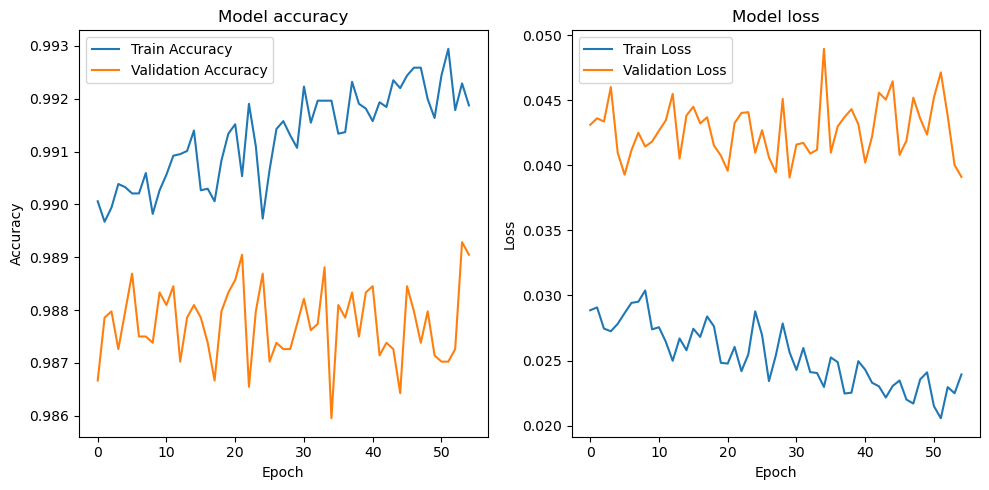

In [106]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(train_model.history['accuracy'], label='Train Accuracy')
plt.plot(train_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_model.history['loss'], label='Train Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

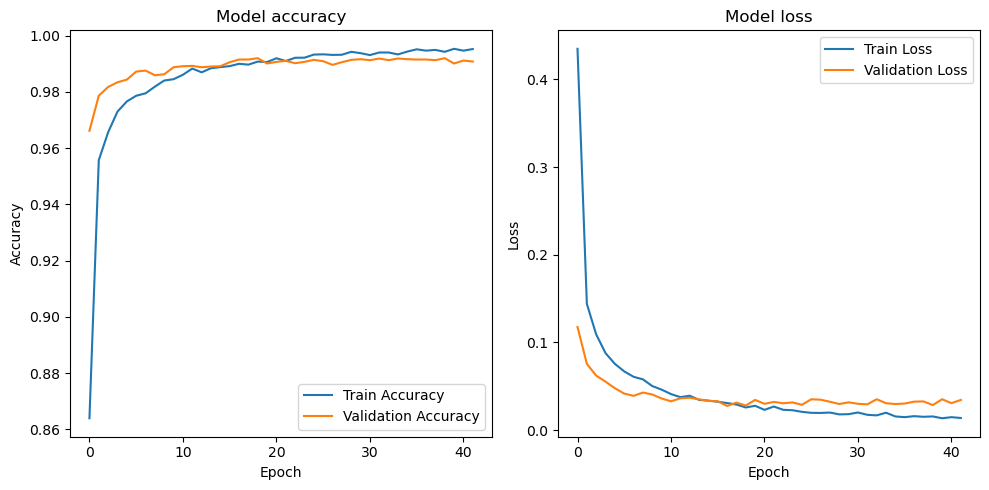

In [113]:
# MODEL 2

plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(train_model.history['accuracy'], label='Train Accuracy')
plt.plot(train_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_model.history['loss'], label='Train Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

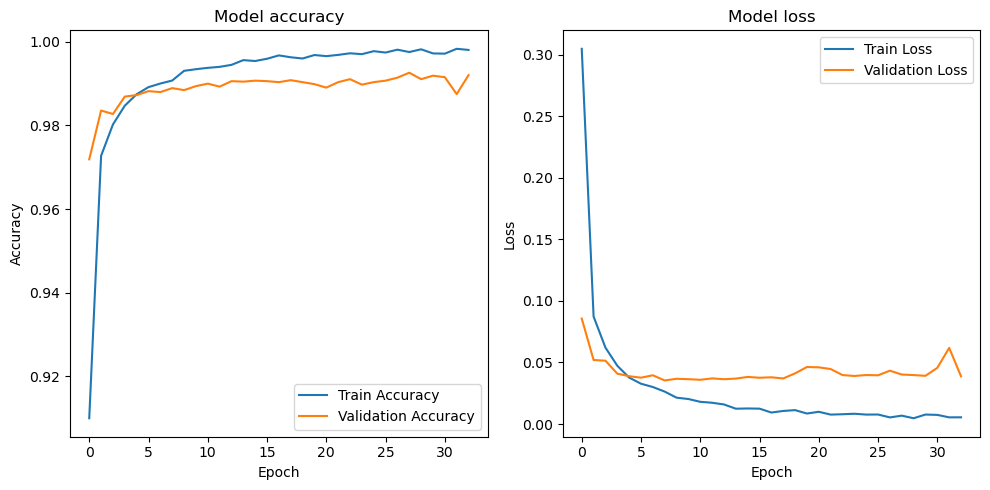

In [127]:
# MODEL 3

plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(train_model.history['accuracy'], label='Train Accuracy')
plt.plot(train_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_model.history['loss'], label='Train Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Results</p>

In [52]:
results= model.predict(test)
results=np.argmax(results,axis=1)
results=pd.Series(results,name="Label")

In [53]:
submission = pd.DataFrame({"ImageId":[i+1 for i in range(len(results))],"Label":results})
submission.to_csv('submission.csv', index=False)